In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

In [5]:
rays_df = pd.read_csv("rays 2018.csv")
rays_df.head(5)

,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
0,1,Thursday Mar 29,boxscore,TBR,NaN,BOS,W,6,4,NaN,...,1,Tied,Pruitt,Smith,Colome,3:00,D,31042.0,+,NaN
1,2,Friday Mar 30,boxscore,TBR,NaN,BOS,L,0,1,NaN,...,3,1.0,Price,Roe,Kimbrel,2:46,N,19203.0,-,NaN
2,3,Saturday Mar 31,boxscore,TBR,NaN,BOS,L,2,3,NaN,...,4,1.0,Porcello,Kittredge,Kimbrel,3:21,N,17838.0,--,NaN
3,4,Sunday Apr 1,boxscore,TBR,NaN,BOS,L,1,2,NaN,...,5,2.0,Velazquez,Alvarado,Kelly,3:24,D,14256.0,---,NaN
4,5,Tuesday Apr 3,boxscore,TBR,@,NYY,L,4,11,NaN,...,4,3.5,Kahnle,Pruitt,NaN,3:29,D,46776.0,----,NaN


In [6]:
print(rays_df.columns)
print(rays_df.info())

Index(['Gm#', 'Date', 'Unnamed: 2', 'Tm', 'Unnamed: 4', 'Opp', 'W/L', 'R',
       'RA', 'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N',
       'Attendance', 'Streak', 'Orig. Scheduled'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 21 columns):
Gm#                162 non-null int64
Date               162 non-null object
Unnamed: 2         162 non-null object
Tm                 162 non-null object
Unnamed: 4         81 non-null object
Opp                162 non-null object
W/L                162 non-null object
R                  162 non-null int64
RA                 162 non-null int64
Inn                12 non-null float64
W-L                162 non-null object
Rank               162 non-null int64
GB                 162 non-null object
Win                162 non-null object
Loss               162 non-null object
Save               92 non-null object
Time               162 non-null object
D/N        

In [7]:
"""
changing some column names to make it more readable
"""

rays_df.rename(columns={'Unnamed: 4': 'home_or_away', 'R': 'runs_scored', 'RA': 'runs_allowed'}, inplace=True)
rays_df.columns

Index(['Gm#', 'Date', 'Unnamed: 2', 'Tm', 'home_or_away', 'Opp', 'W/L',
       'runs_scored', 'runs_allowed', 'Inn', 'W-L', 'Rank', 'GB', 'Win',
       'Loss', 'Save', 'Time', 'D/N', 'Attendance', 'Streak',
       'Orig. Scheduled'],
      dtype='object')

In [8]:
cols_to_keep = [ 'Attendance', 'Gm#', 'Date', 'Tm', 'home_or_away', 'Opp', 'W/L', 'runs_scored', 'runs_allowed', 'W-L', 'Rank', 'GB', 'Time', 'D/N', 'Streak']

In [9]:
"""
removing columns not using as features
"""
rays_df = rays_df[cols_to_keep]
rays_df.head(5)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak
0,31042.0,1,Thursday Mar 29,TBR,NaN,BOS,W,6,4,1-0,1,Tied,3:00,D,+
1,19203.0,2,Friday Mar 30,TBR,NaN,BOS,L,0,1,1-1,3,1.0,2:46,N,-
2,17838.0,3,Saturday Mar 31,TBR,NaN,BOS,L,2,3,1-2,4,1.0,3:21,N,--
3,14256.0,4,Sunday Apr 1,TBR,NaN,BOS,L,1,2,1-3,5,2.0,3:24,D,---
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----


In [10]:
rays_df['GB'] = rays_df['GB'].str.replace('Tied', '0')
rays_df['GB'] = pd.to_numeric(rays_df['GB'])
rays_df.head(5)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak
0,31042.0,1,Thursday Mar 29,TBR,NaN,BOS,W,6,4,1-0,1,0.0,3:00,D,+
1,19203.0,2,Friday Mar 30,TBR,NaN,BOS,L,0,1,1-1,3,1.0,2:46,N,-
2,17838.0,3,Saturday Mar 31,TBR,NaN,BOS,L,2,3,1-2,4,1.0,3:21,N,--
3,14256.0,4,Sunday Apr 1,TBR,NaN,BOS,L,1,2,1-3,5,2.0,3:24,D,---
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----


In [11]:
print(rays_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
Attendance      161 non-null float64
Gm#             162 non-null int64
Date            162 non-null object
Tm              162 non-null object
home_or_away    81 non-null object
Opp             162 non-null object
W/L             162 non-null object
runs_scored     162 non-null int64
runs_allowed    162 non-null int64
W-L             162 non-null object
Rank            162 non-null int64
GB              162 non-null float64
Time            162 non-null object
D/N             162 non-null object
Streak          162 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 19.1+ KB
None


In [12]:
rays_df['home_or_away'].fillna(value='Home', inplace=True)
rays_df.head(10)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak
0,31042.0,1,Thursday Mar 29,TBR,Home,BOS,W,6,4,1-0,1,0.0,3:00,D,+
1,19203.0,2,Friday Mar 30,TBR,Home,BOS,L,0,1,1-1,3,1.0,2:46,N,-
2,17838.0,3,Saturday Mar 31,TBR,Home,BOS,L,2,3,1-2,4,1.0,3:21,N,--
3,14256.0,4,Sunday Apr 1,TBR,Home,BOS,L,1,2,1-3,5,2.0,3:24,D,---
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----
5,40028.0,6,Wednesday Apr 4,TBR,@,NYY,L,2,7,1-5,4,4.0,2:44,D,-----
6,36134.0,7,Thursday Apr 5,TBR,@,BOS,L-wo,2,3,1-6,5,5.0,3:55,D,------
7,31821.0,8,Saturday Apr 7,TBR,@,BOS,L,3,10,1-7,5,6.0,2:48,D,-------
8,31979.0,9,Sunday Apr 8,TBR,@,BOS,L,7,8,1-8,5,7.0,3:50,D,--------
9,10377.0,10,Monday Apr 9,TBR,@,CHW,W,5,4,2-8,5,6.5,3:47,D,+


In [13]:
win_loss = rays_df['W-L'].str.split('-', expand=True)
win_loss.head()

,0,1
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


In [14]:
rays_df['Total_wins'] = win_loss[0]
rays_df['Total_losses'] = win_loss[1]
rays_df[['Total_wins', 'Total_losses']] = rays_df[['Total_wins', 'Total_losses']].apply(pd.to_numeric)
rays_df.head()

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak,Total_wins,Total_losses
0,31042.0,1,Thursday Mar 29,TBR,Home,BOS,W,6,4,1-0,1,0.0,3:00,D,+,1,0
1,19203.0,2,Friday Mar 30,TBR,Home,BOS,L,0,1,1-1,3,1.0,2:46,N,-,1,1
2,17838.0,3,Saturday Mar 31,TBR,Home,BOS,L,2,3,1-2,4,1.0,3:21,N,--,1,2
3,14256.0,4,Sunday Apr 1,TBR,Home,BOS,L,1,2,1-3,5,2.0,3:24,D,---,1,3
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----,1,4


In [15]:
rays_df['Win_differential'] = rays_df['Total_wins'] - rays_df['Total_losses']
rays_df.head(5)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak,Total_wins,Total_losses,Win_differential
0,31042.0,1,Thursday Mar 29,TBR,Home,BOS,W,6,4,1-0,1,0.0,3:00,D,+,1,0,1
1,19203.0,2,Friday Mar 30,TBR,Home,BOS,L,0,1,1-1,3,1.0,2:46,N,-,1,1,0
2,17838.0,3,Saturday Mar 31,TBR,Home,BOS,L,2,3,1-2,4,1.0,3:21,N,--,1,2,-1
3,14256.0,4,Sunday Apr 1,TBR,Home,BOS,L,1,2,1-3,5,2.0,3:24,D,---,1,3,-2
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----,1,4,-3


In [16]:
"""
making a column where every win is = 1 so I can count them cumulatively for last 10 games
"""
rays_df['win_value'] = rays_df['W/L'].str.replace("W", "1")
rays_df['win_value'] = rays_df['win_value'].str.replace("L", "0")
rays_df['win_value'] = rays_df['win_value'].str.replace("0-wo", "0")
rays_df['win_value'] = rays_df['win_value'].str.replace("1-wo", "1")
rays_df['win_value'] = pd.to_numeric(rays_df['win_value'])
rays_df.head(5)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak,Total_wins,Total_losses,Win_differential,win_value
0,31042.0,1,Thursday Mar 29,TBR,Home,BOS,W,6,4,1-0,1,0.0,3:00,D,+,1,0,1,1
1,19203.0,2,Friday Mar 30,TBR,Home,BOS,L,0,1,1-1,3,1.0,2:46,N,-,1,1,0,0
2,17838.0,3,Saturday Mar 31,TBR,Home,BOS,L,2,3,1-2,4,1.0,3:21,N,--,1,2,-1,0
3,14256.0,4,Sunday Apr 1,TBR,Home,BOS,L,1,2,1-3,5,2.0,3:24,D,---,1,3,-2,0
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----,1,4,-3,0


In [17]:
"""
This counts the amount of wins in last 10 games
"""
rays_df['Wins_last_10'] = rays_df['win_value'].rolling(min_periods=10, window=10).sum()
rays_df.head(81)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,GB,Time,D/N,Streak,Total_wins,Total_losses,Win_differential,win_value,Wins_last_10
0,31042.0,1,Thursday Mar 29,TBR,Home,BOS,W,6,4,1-0,1,0.0,3:00,D,+,1,0,1,1,NaN
1,19203.0,2,Friday Mar 30,TBR,Home,BOS,L,0,1,1-1,3,1.0,2:46,N,-,1,1,0,0,NaN
2,17838.0,3,Saturday Mar 31,TBR,Home,BOS,L,2,3,1-2,4,1.0,3:21,N,--,1,2,-1,0,NaN
3,14256.0,4,Sunday Apr 1,TBR,Home,BOS,L,1,2,1-3,5,2.0,3:24,D,---,1,3,-2,0,NaN
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,4,3.5,3:29,D,----,1,4,-3,0,NaN
5,40028.0,6,Wednesday Apr 4,TBR,@,NYY,L,2,7,1-5,4,4.0,2:44,D,-----,1,5,-4,0,NaN
6,36134.0,7,Thursday Apr 5,TBR,@,BOS,L-wo,2,3,1-6,5,5.0,3:55,D,------,1,6,-5,0,NaN
7,31821.0,8,Saturday Apr 7,TBR,@,BOS,L,3,10,1-7,5,6.0,2:48,D,-------,1,7,-6,0,NaN
8,31979.0,9,Sunday Apr 8,TBR,@,BOS,L,7,8,1-8,5,7.0,3:50,D,--------,1,8,-7,0,NaN
9,10377.0,10,Monday Apr 9,TBR,@,CHW,W,5,4,2-8,5,6.5,3:47,D,+,2,8,-6,1,2.0


In [18]:
"""
Mean runs last 10 games
"""

rays_df['Mean_runs_last_10'] = rays_df['runs_scored'].rolling(min_periods=1, window=10).mean()
rays_df.head(81)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,...,GB,Time,D/N,Streak,Total_wins,Total_losses,Win_differential,win_value,Wins_last_10,Mean_runs_last_10
0,31042.0,1,Thursday Mar 29,TBR,Home,BOS,W,6,4,1-0,...,0.0,3:00,D,+,1,0,1,1,NaN,6.000000
1,19203.0,2,Friday Mar 30,TBR,Home,BOS,L,0,1,1-1,...,1.0,2:46,N,-,1,1,0,0,NaN,3.000000
2,17838.0,3,Saturday Mar 31,TBR,Home,BOS,L,2,3,1-2,...,1.0,3:21,N,--,1,2,-1,0,NaN,2.666667
3,14256.0,4,Sunday Apr 1,TBR,Home,BOS,L,1,2,1-3,...,2.0,3:24,D,---,1,3,-2,0,NaN,2.250000
4,46776.0,5,Tuesday Apr 3,TBR,@,NYY,L,4,11,1-4,...,3.5,3:29,D,----,1,4,-3,0,NaN,2.600000
5,40028.0,6,Wednesday Apr 4,TBR,@,NYY,L,2,7,1-5,...,4.0,2:44,D,-----,1,5,-4,0,NaN,2.500000
6,36134.0,7,Thursday Apr 5,TBR,@,BOS,L-wo,2,3,1-6,...,5.0,3:55,D,------,1,6,-5,0,NaN,2.428571
7,31821.0,8,Saturday Apr 7,TBR,@,BOS,L,3,10,1-7,...,6.0,2:48,D,-------,1,7,-6,0,NaN,2.500000
8,31979.0,9,Sunday Apr 8,TBR,@,BOS,L,7,8,1-8,...,7.0,3:50,D,--------,1,8,-7,0,NaN,3.000000
9,10377.0,10,Monday Apr 9,TBR,@,CHW,W,5,4,2-8,...,6.5,3:47,D,+,2,8,-6,1,2.0,3.200000


In [19]:
"""
run differential -- I checked the final number(+70) and it was accurate
"""
rays_df['cum_runs_scored'] = rays_df['runs_scored'].cumsum()
rays_df['cum_runs_allowed'] = rays_df['runs_allowed'].cumsum()
rays_df['run_differential'] = rays_df['cum_runs_scored'] - rays_df['cum_runs_allowed']
rays_df.tail(5)

,Attendance,Gm#,Date,Tm,home_or_away,Opp,W/L,runs_scored,runs_allowed,W-L,...,Streak,Total_wins,Total_losses,Win_differential,win_value,Wins_last_10,Mean_runs_last_10,cum_runs_scored,cum_runs_allowed,run_differential
157,11325.0,158,Wednesday Sep 26,TBR,Home,NYY,W,8,7,88-70,...,+,88,70,18,1,6.0,5.3,696,620,76
158,12349.0,159,Thursday Sep 27,TBR,Home,NYY,L,1,12,88-71,...,-,88,71,17,0,5.0,5.1,697,632,65
159,12061.0,160,Friday Sep 28,TBR,Home,TOR,L,6,7,88-72,...,--,88,72,16,0,4.0,5.3,703,639,64
160,13221.0,161,Saturday Sep 29,TBR,Home,TOR,W,4,3,89-72,...,+,89,72,17,1,4.0,4.8,707,642,65
161,13313.0,162,Sunday Sep 30,TBR,Home,TOR,W,9,4,90-72,...,++,90,72,18,1,5.0,4.9,716,646,70


# DON'T REMOVE AWAY GAMES UNTIL ALL CUMULATIVE STATS ARE ENTERED

In [20]:
"""
here I am removing all away games from the df
"""
df_home = rays_df[rays_df['home_or_away'] == 'Home']
df_home.columns

Index(['Attendance', 'Gm#', 'Date', 'Tm', 'home_or_away', 'Opp', 'W/L',
       'runs_scored', 'runs_allowed', 'W-L', 'Rank', 'GB', 'Time', 'D/N',
       'Streak', 'Total_wins', 'Total_losses', 'Win_differential', 'win_value',
       'Wins_last_10', 'Mean_runs_last_10', 'cum_runs_scored',
       'cum_runs_allowed', 'run_differential'],
      dtype='object')

In [21]:
rays_vis = df_home[['Attendance', 'Gm#', 'Win_differential', 'Wins_last_10', 'Mean_runs_last_10', 'GB', 'run_differential']].copy()
rays_vis.head(5)

,Attendance,Gm#,Win_differential,Wins_last_10,Mean_runs_last_10,GB,run_differential
0,31042.0,1,1,NaN,6.000000,0.0,2
1,19203.0,2,0,NaN,3.000000,1.0,1
2,17838.0,3,-1,NaN,2.666667,1.0,0
3,14256.0,4,-2,NaN,2.250000,2.0,-1
12,13372.0,13,-7,2.0,3.200000,8.0,-22


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


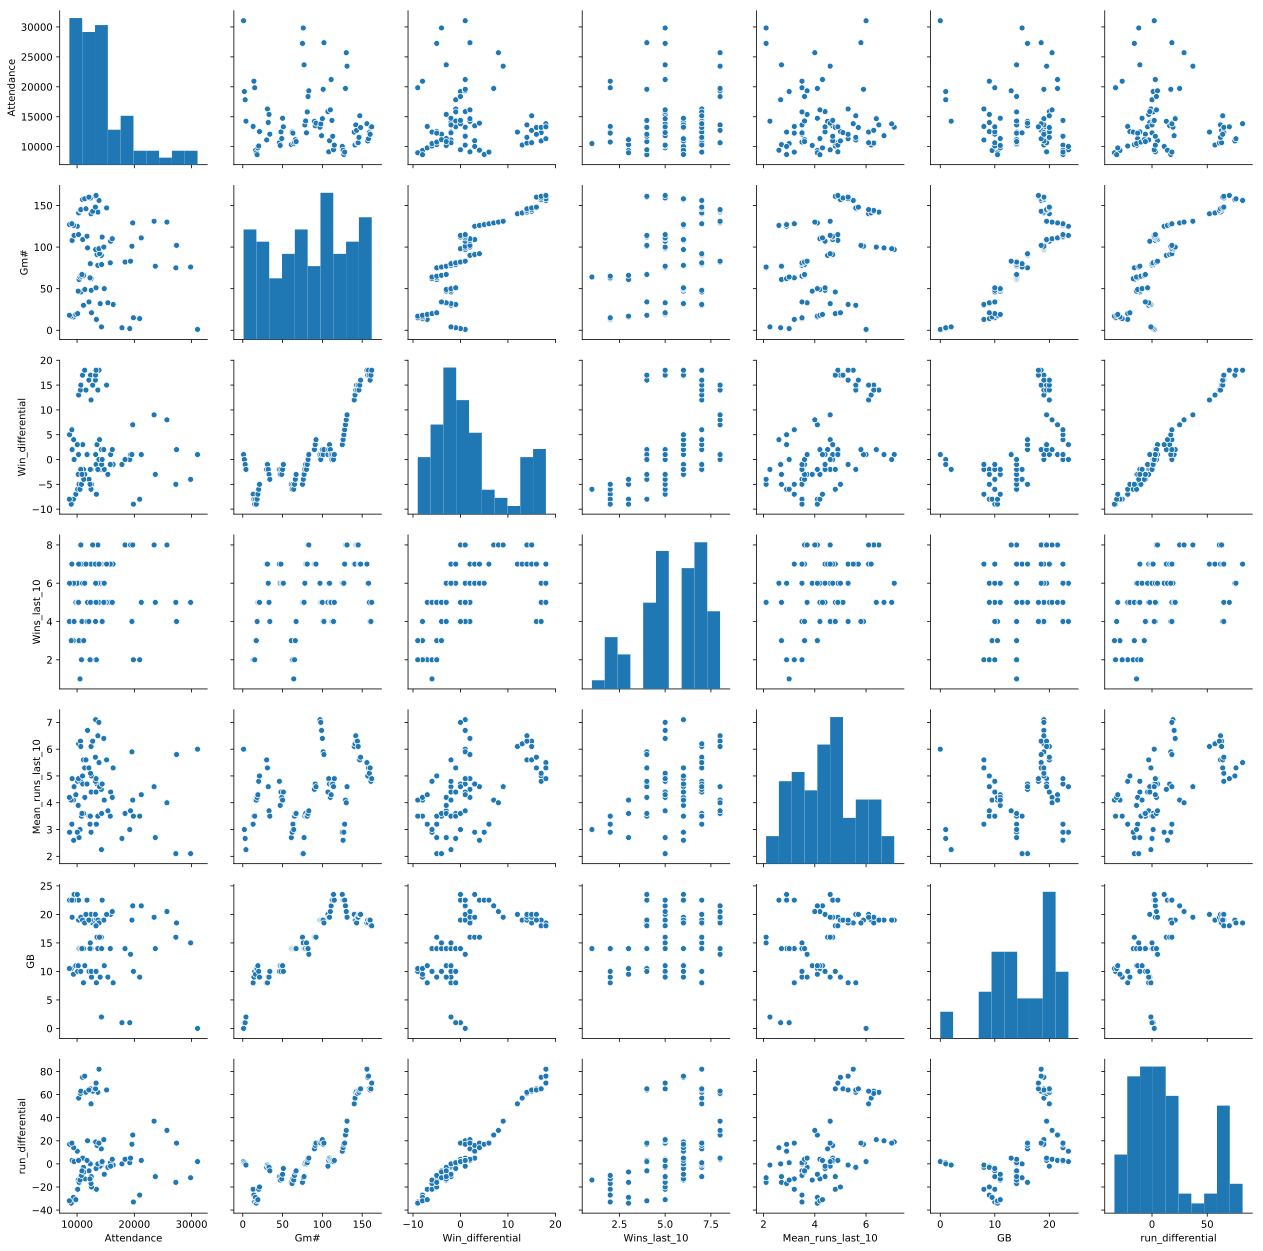

In [22]:
sns.pairplot(rays_vis);